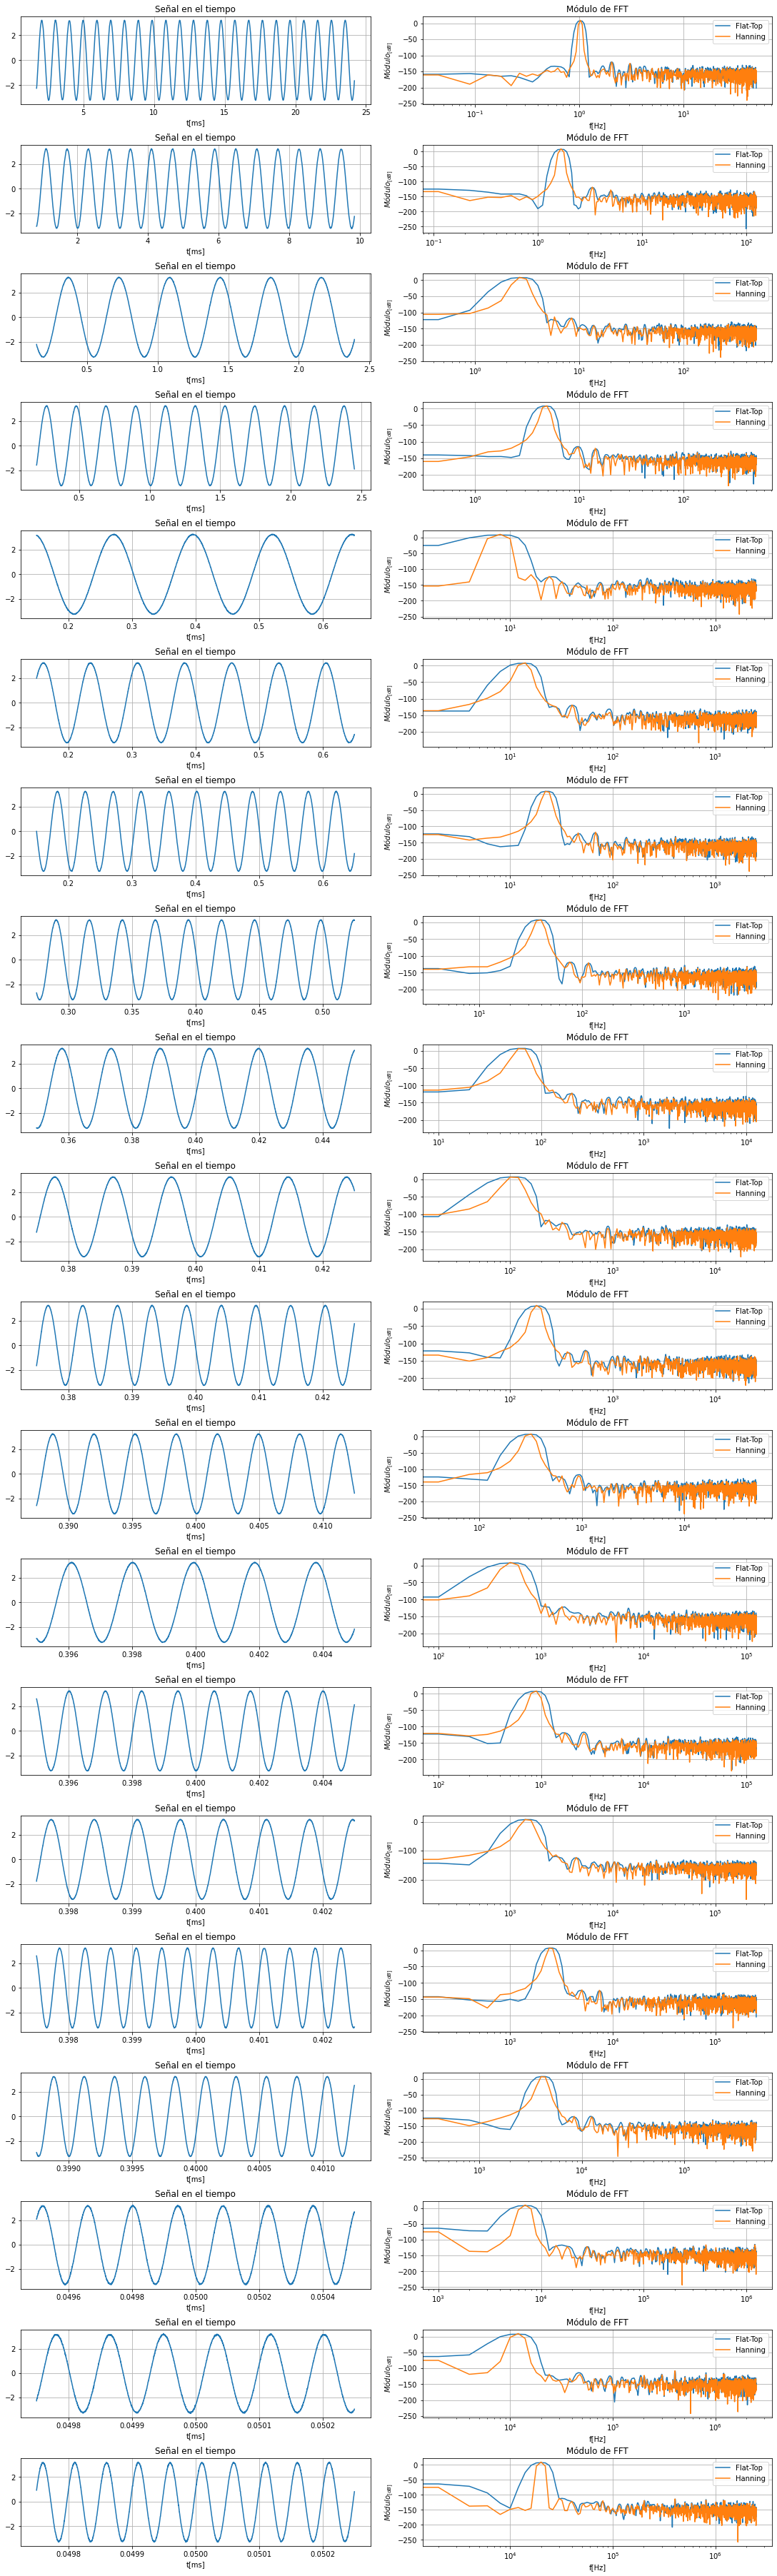

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def THD_Processing(datos):
  tiempo = datos[:,3]
  tension = datos[:,4]

  fs = 1/(tiempo[1] - tiempo[0])

  ventana_flat_top = signal.windows.flattop(len(tiempo))
  Factor_Correccion_FT = 4.18

  ventana_hann = signal.windows.hann(len(tiempo))
  factor_correc_hann = 2

  fft_tension_FT = Factor_Correccion_FT * np.fft.fft(tension*ventana_flat_top,len(tiempo)) / len(tiempo)
  fft_tension_hann = factor_correc_hann * np.fft.fft(tension*ventana_hann,len(tiempo)) / len(tiempo)

  # Separo parte pos de parte neg
  fft_tension_FT = fft_tension_FT[0:int(len(tiempo)/2)]
  fft_tension_hann = fft_tension_hann[0:int(len(tiempo)/2)]

  #Defino vector de frecuencia solo para positivas
  mitad_muestras = int(len(tiempo) / 2)
  res_espectral = fs / len(tiempo)
  freq = np.linspace(0,mitad_muestras,mitad_muestras) * res_espectral

  return tiempo, tension, freq, fft_tension_FT, fft_tension_hann

#Obtengo los datos de cada archivo

lista_datos = []
for index in range(2, 22):
  lista_datos.append(np.genfromtxt('./Oscilogramas THD/TEK00'+str(index)+'.CSV', delimiter=','))

fig,ax = plt.subplots(len(lista_datos),2,constrained_layout=True,figsize=(15,50))

for index in range(0,len(lista_datos)):
  tiempo, tension, freq, fft_tension_FT, fft_tension_hann = THD_Processing(lista_datos[index])
  ax[index,0].plot(tiempo, tension)
  ax[index,0].set_xlabel('t[ms]')
  ax[index,0].set_ylabel('')
  ax[index,0].grid()
  ax[index,0].set_title("Señal en el tiempo")

  ax[index,1].plot(freq, 20*np.log(abs(fft_tension_FT)), freq, 20*np.log(abs(fft_tension_hann)))
  ax[index,1].set_xlabel('f[Hz]')
  ax[index,1].set_ylabel(r'$Módulo_{[dB]}$')
  ax[index,1].set_xscale('log')
  ax[index,1].grid()
  ax[index,1].legend(['Flat-Top', 'Hanning'])
  ax[index,1].set_title("Módulo de FFT")